In [90]:
import numpy as np
from PIL import Image
import math as m
import matplotlib.pyplot as plt

In [148]:
class TinyCNN:
    def __init__(self):
        self.kernel = np.array([
            [ 1,  0, -1],
            [ 2,  0, -2],
            [ 1,  0, -1]
        ])
        self.weights = np.random.uniform(low=-0.1, high=0.1, size=(3,3))
        self.biases = 0.01
        
    def conv(self, x): # 3x3 filter application to a 28x28 matrix input
        # 10x10 matrix output
        #output = np.zeros()
        padded_x = np.pad(x, pad_width=1, mode='constant', constant_values=0)  # padding = (3-1)/2 = 1
        output = np.zeros((10,10))
    
        for i in range(len(output)):
            for j in range(len(output)):
                sub_matrix = padded_x[i:i+3, j:j+3]
                output[i, j] = np.sum(sub_matrix * self.kernel) + self.biases
    
        return output
        
    def max_pooling(self, x): # return a 5x5 matrix 
        M, N = x.shape
        k = 2
        l = 2
        MK = M//k
        NL = N//l
        
        return x[:MK*k, :NL*l].reshape(MK, k, NL, l).max(axis=(1,3))

    def flatten(self, x):
        return x.flatten()

    def sigmoid(self, x):
        # Usar np.exp para manejar arrays
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        conv_output = self.conv(x)
        activated_output = np.maximum(0, conv_output)
        pooled_output = self.max_pooling(activated_output)
        flattened_output = self.flatten(pooled_output)
        final_output = self.sigmoid(flattened_output)
        return final_output

    def compute_loss(self, y_pred, y_true):
        return -np.mean(y_true * np.log(y_pred + 1e-8) + (1-y_true) * np.log(1 - y_pred + 1e-8))

    def train(self, X_train, y_train, epochs=10, learning_rate=0.01):
        losses = []
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(len(X_train)):
                x = X_train[i]
                y_true = y_train[i]
                
                # Forward pass
                y_pred = self.forward(x)
                
                # Compute loss
                loss = self.compute_loss(y_pred, y_true)
                epoch_loss += loss
                
                # Backward pass (simplified version, needs proper implementation)

            # average loss
            average_loss = epoch_loss / len(X_train)
            losses.append(average_loss)
            print(f'Epoch {epoch+1}/{epochs}, Loss: {average_loss}')
        
        # Graficar la pérdida
        plt.plot(range(epochs), losses, marker='o')
        plt.title('Pérdida durante el entrenamiento')
        plt.xlabel('Épocas')
        plt.ylabel('Pérdida')
        plt.grid(True)
        plt.show()

In [114]:
def load_image(image_path):
    img = Image.open(image_path).convert('L')  
    img = img.resize((28, 28), Image.BICUBIC)
    return np.array(img)

Epoch 1/10, Loss: 0.8007996475172661
Epoch 2/10, Loss: 0.8007996475172661
Epoch 3/10, Loss: 0.8007996475172661
Epoch 4/10, Loss: 0.8007996475172661
Epoch 5/10, Loss: 0.8007996475172661
Epoch 6/10, Loss: 0.8007996475172661
Epoch 7/10, Loss: 0.8007996475172661
Epoch 8/10, Loss: 0.8007996475172661
Epoch 9/10, Loss: 0.8007996475172661
Epoch 10/10, Loss: 0.8007996475172661


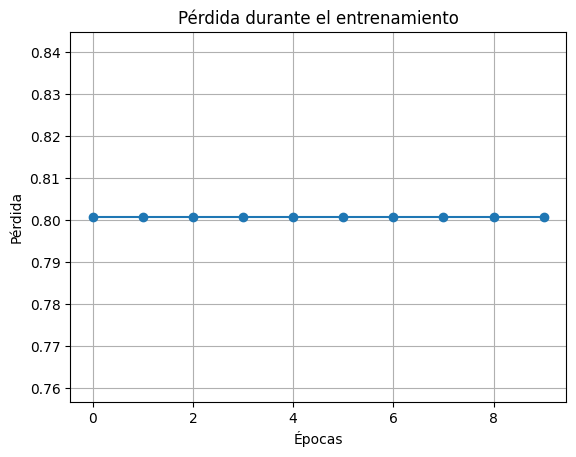

In [149]:
X_train = np.random.rand(10, 28, 28)  # 10 imágenes de 28x28
y_train = np.random.randint(0, 2, size=(10, 5*5))  # Etiquetas (clases binarias) para cada imagen

tiny_cnn = TinyCNN()
tiny_cnn.train(X_train, y_train, epochs=10, learning_rate=0.01)